미니배치

In [1]:
import numpy as np

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [3]:
len(t)

10

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))/batch_size
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

라벨 인코딩인 경우 미니배치

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    delta = 1e-7
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta))/batch_size

In [7]:
cross_entropy_error(np.array(y), np.array(t))

23.718987110506905

In [8]:
y = np.array([[2, 1]])
t = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])
print(t.size)
print(y.size)

20
2


미분

In [7]:
def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h) - f(x))/h

In [8]:
def numerical_diff(f, x):
    h = 1e-7
    return (f(x+h)-f(x-h))/(2*h)

In [9]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 

In [10]:
numerical_diff(function_1, 5)

0.19999999989472883

In [11]:
import matplotlib.pylab as plt

In [12]:
def tangent_line(f,x):
    d = numerical_diff(f,x)
    y = f(x) - d*x
    return lambda t: d*t + y

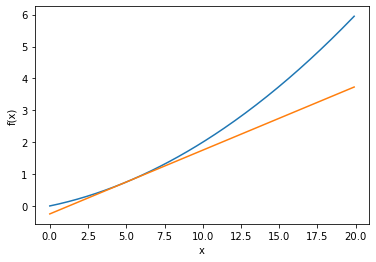

In [13]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

Gradient Descent

In [14]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [15]:
def numerical_gradient(f, x):
    h = 1e-7
    
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)
        x[idx] = float(tmp_val) +h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = float(tmp_val) -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [16]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([5.99999998, 8.        ])

경사 하강법

In [17]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x, np.array(x_history)

In [18]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

In [19]:
x

array([-6.11110793e-10,  8.14814392e-10])

In [20]:
x_history

array([[-3.00000000e+00,  4.00000000e+00],
       [-2.40000000e+00,  3.20000000e+00],
       [-1.92000000e+00,  2.56000000e+00],
       [-1.53600000e+00,  2.04800000e+00],
       [-1.22880000e+00,  1.63840000e+00],
       [-9.83040001e-01,  1.31072000e+00],
       [-7.86432000e-01,  1.04857600e+00],
       [-6.29145601e-01,  8.38860801e-01],
       [-5.03316480e-01,  6.71088641e-01],
       [-4.02653184e-01,  5.36870913e-01],
       [-3.22122547e-01,  4.29496730e-01],
       [-2.57698038e-01,  3.43597384e-01],
       [-2.06158430e-01,  2.74877907e-01],
       [-1.64926744e-01,  2.19902326e-01],
       [-1.31941395e-01,  1.75921861e-01],
       [-1.05553116e-01,  1.40737489e-01],
       [-8.44424931e-02,  1.12589991e-01],
       [-6.75539945e-02,  9.00719927e-02],
       [-5.40431956e-02,  7.20575942e-02],
       [-4.32345565e-02,  5.76460753e-02],
       [-3.45876452e-02,  4.61168603e-02],
       [-2.76701161e-02,  3.68934882e-02],
       [-2.21360929e-02,  2.95147906e-02],
       [-1.

러닝 레이트가 많은 경우

In [21]:
init_x = np.array([-3.0, 4.0])  
x, x_history = gradient_descent(function_2, init_x, lr=10, step_num=step_num)
x

array([ 2.25899015e+09, -3.00990351e+09])

러닝 레이트가 적은 경우

In [22]:
init_x = np.array([-3.0, 4.0])  
x, x_history = gradient_descent(function_2, init_x, lr=1e-10, step_num=100)
x

array([-2.99999994,  3.99999992])

단층 신경망

In [23]:
def softmax(x):
    exp_x = np.exp(x)
    if exp_x.ndim == 1:
        sum_exp_x = sum(exp_x)
    else : 
        sum_exp_x = np.sum(exp_x, axis=1).reshape(-1,1)
        
    y = exp_x / sum_exp_x
    
    return y


In [24]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    
    batch_size = y.shape[0]
    
    delta = 1e-7
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta))/batch_size

In [25]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-7
    
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h)
        x[idx] = float(tmp_val) +h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = float(tmp_val) -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


In [26]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f,X)
    
    else :
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f,x)
        
        return grad

In [27]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [28]:
net = simpleNet()
net.W

array([[-0.43466416, -0.15487517,  0.25438857],
       [-1.99497187, -0.21689668,  0.91822127]])

In [29]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([-2.05627318, -0.28813212,  0.97903229])

In [30]:
np.argmax(p)

2

In [31]:
t = np.array([0, 0, 1])
net.loss(x, t)

8.192604692574866

In [32]:
def f(W): # 더미 라고 하셨음 좀더 봐야할듯....ㅎ.ㅎ.ㅎ.ㅎ.
    return net.loss(x, t)
dw = numerical_gradient(f, net.W)
dw

array([[-1.13493801, -0.21875922,  1.35369723],
       [-1.70240702, -0.32813882,  2.03054585]])

In [33]:
dw = numerical_gradient(lambda w: net.loss(x, t), net.W) # 람다로 풀어씀
dw

array([[-1.13493801, -0.21875922,  1.35369723],
       [-1.70240702, -0.32813882,  2.03054585]])

 여기서 스탑! ㅋㅋㅋㅋㅋ

In [34]:
net.W -= 0.001 * dw # 

In [35]:
p = net.predict(x)
p

array([-2.05406005, -0.28770554,  0.97639258])

In [36]:
np.argmax(p)

2

In [37]:
t = np.array([0, 0, 1])
net.loss(x, t)

8.182310520692416

이층 신경망

In [38]:
import pickle

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T

    with open('mnist.pkl', 'rb') as f: #알아서 학습이 되는건가? f
        dataset = pickle.load(f)
        
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

In [39]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    
    delta = 1e-7
    return -np.sum(np.log(y[np.arange(batch_size), t] + delta))/batch_size

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [41]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(t==y)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [42]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)

In [43]:
t_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [44]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [45]:
print(network.params['W1'].shape)
print(network.params['b1'].shape)
print(network.params['W2'].shape)
print(network.params['b2'].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [46]:
x = np.random.rand(50, 784)
y = network.predict(x)

In [47]:
np.argmax(y[0])

2

In [48]:
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] # train size 60000개 였음
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

In [49]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f"loss : {loss} train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

loss : 2.293731225914733 train acc, test acc | 0.0993, 0.1032
loss : 2.2996903783646845 train acc, test acc | 0.10441666666666667, 0.1028
loss : 2.292340040851765 train acc, test acc | 0.11541666666666667, 0.1161
loss : 2.285913872126021 train acc, test acc | 0.10441666666666667, 0.1028
loss : 2.2791471298649912 train acc, test acc | 0.09751666666666667, 0.0974
loss : 2.296933364578808 train acc, test acc | 0.0993, 0.1032
loss : 2.298418623143078 train acc, test acc | 0.11236666666666667, 0.1135
loss : 2.299797718116416 train acc, test acc | 0.13615, 0.1398
loss : 2.2942399306124095 train acc, test acc | 0.11236666666666667, 0.1135
loss : 2.295197667751185 train acc, test acc | 0.1095, 0.103
loss : 2.294721851853108 train acc, test acc | 0.09751666666666667, 0.0974
loss : 2.2792807843160063 train acc, test acc | 0.09751666666666667, 0.0974
loss : 2.2935873239689677 train acc, test acc | 0.10218333333333333, 0.101
loss : 2.281353336285354 train acc, test acc | 0.09751666666666667, 0.097

KeyboardInterrupt: 